# 0. Import Library

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats

![](https://onlinelibrary.wiley.com/cms/asset/ea1d3bd8-afd7-4914-b645-74d424b6690d/advs3654-fig-0002-m.jpg)

# 1. Input Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis (EDA)

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## 2.2 Data Cleaning

### - Missing Value

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### - Inconsistent Data

In [8]:
df.groupby('Genre')['Genre'].count()

Genre
Female    112
Male       88
Name: Genre, dtype: int64

### - Outliers

## 2.3 Data Transformation

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
def labelEncode(data, columns):
    columns_ = []
    for i in columns:
        lb = LabelEncoder()
        lb_ = lb.fit_transform(data[i].astype(str))
        data[i+'_Encoded']=lb_
        columns_.append(i+'_Encoded')
    return columns_,lb

In [11]:
columns = ['Genre']
enc_columns, lb=labelEncode(df, columns)

In [12]:
df.sample(15)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded
47,48,Female,27,40,47,0
87,88,Female,22,57,55,0
91,92,Male,18,59,41,1
143,144,Female,32,76,87,0
169,170,Male,32,87,63,1
101,102,Female,49,62,48,0
50,51,Female,49,42,52,0
3,4,Female,23,16,77,0
15,16,Male,22,20,79,1
54,55,Female,50,43,45,0


In [13]:
for i in enc_columns:
    print(i[:-8])
    print(' ',df[i[:-8]].unique())
    print(' ',df[i].unique())
    print('  -------')

Genre
  ['Male' 'Female']
  [1 0]
  -------


## [Optional] Export เป็นไฟล์เมื่อทำ Data Cleaning เสร็จแล้ว

In [14]:
#ไม่ต้อง Export
#df.to_csv('รหัสนักศึกษา.csv',index=False)

## 2.4 ตรวจสอบค่าสหสัมพันธ์ของตัวแปร x, y

In [15]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109
Genre_Encoded,0.057400,0.060867,0.056410,-0.058109,1.000000


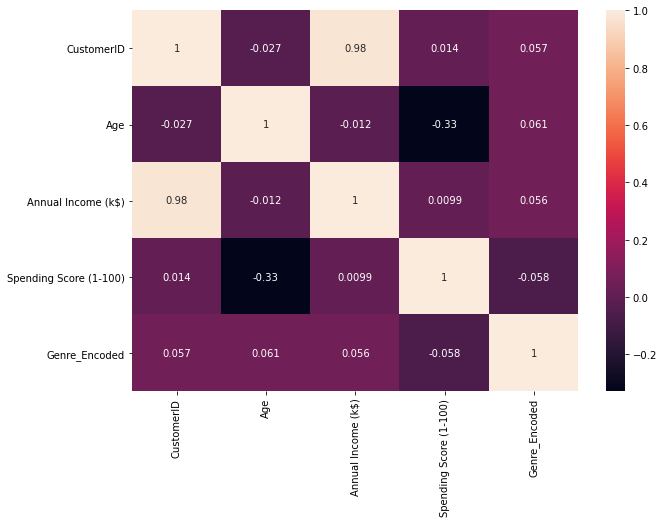

In [16]:
plt.rcParams['figure.figsize'] = 10,7 
sns.heatmap(df.corr(), annot=True);

## 2.5 การกำหนด Feature

In [17]:
X=df.iloc[:, [2,4]].values

# 3. Modelling: AGNES

![](https://smritimishrain.files.wordpress.com/2021/04/screenshot-2021-04-25-at-00.30.35.png?w=1024)
![](https://media.geeksforgeeks.org/wp-content/uploads/20230227155417/download-(5).png)

In [18]:
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch

## 3.1 Clustering Data

In [19]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

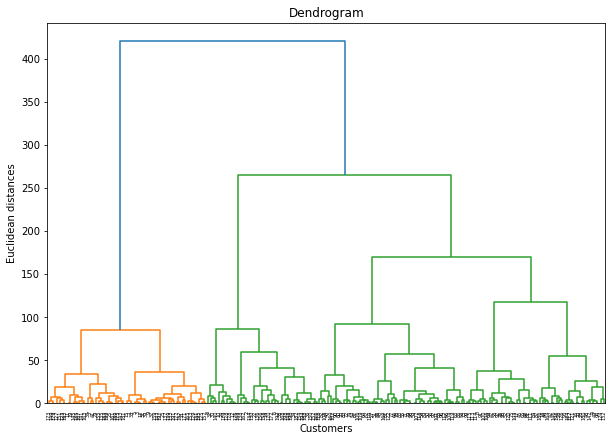

In [20]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## 3.2 Predict Data

In [21]:
y_hc = model.fit_predict(X)

In [22]:
y_hc

array([4, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 4, 3, 1, 3, 1,
       2, 1, 2, 1, 3, 0, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 3, 0,
       3, 4, 0, 4, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 0, 4, 0, 3, 3, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 3, 4, 4, 4, 0, 0, 0, 0, 4, 3, 0, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1,
       2, 1], dtype=int64)

In [23]:
df["Cluster"]=y_hc

In [24]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded,Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,3


In [25]:
df[df["Cluster"]==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded,Cluster
27,28,Male,35,28,61,1,0
40,41,Female,65,38,35,0,0
43,44,Female,31,39,61,0,0
46,47,Female,50,40,55,0,0
50,51,Female,49,42,52,0,0
51,52,Male,33,42,60,1,0
53,54,Male,59,43,60,1,0
54,55,Female,50,43,45,0,0
55,56,Male,47,43,41,1,0
56,57,Female,51,44,50,0,0


In [26]:
df['Cluster'].value_counts()

1    57
0    53
2    40
4    26
3    24
Name: Cluster, dtype: int64

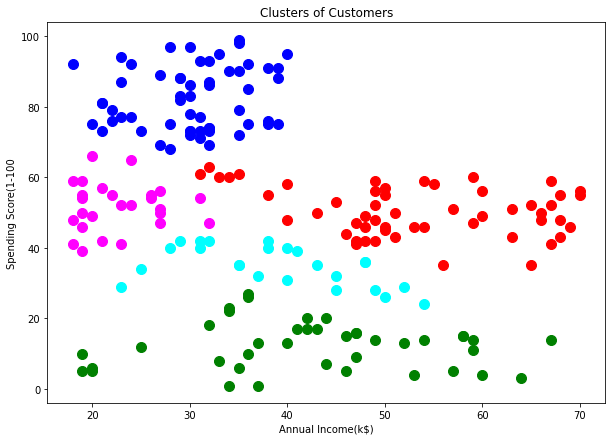

In [27]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

# 4. Model Evaluation

## 4.1 Silhouette Score 

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_avg = silhouette_score(X, y_hc)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.40374071753059787


## 4.2 Davies-Bouldin Index

In [30]:
from sklearn.metrics import davies_bouldin_score

In [31]:
davies_bouldin_idx = davies_bouldin_score(X, y_hc)
print("The Davies-Bouldin index is:", davies_bouldin_idx)

The Davies-Bouldin index is: 0.8285234685762868


# [Optional] Save Machine Learning Models

In [32]:
#import pickle
#filename = 'pickle_รหัสนศ.sav'
#pickle.dump(model, open(filename, 'wb'))